# EX3

 use tf_idf for embedding                                                                                              
               Not using feature eng                                                                                                                          
               use Down-Sampling                                                                                                             
               use RandomForestClassifier

Down-Sampling

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import ast

In [40]:
df = pd.read_csv("N_gram.csv")
df.head()

,Unnamed: 0,ماشین,لباسشویی,دوقلوی,کودک,سازنده,برند,قدیمی,ناسیونال,یک,...,فرمون,دوخته,فرزانگان,cat1,cat2,cat3,price,size,year,room_number
0,0,1,1,1,1,1,1,1,1,1,...,0,0,0,home-kitchen,appliance,washing-machines,1850000.0,0,0,0
1,1,0,3,0,0,0,0,0,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,8000000.0,0,0,0
2,2,3,2,0,0,0,0,0,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,5500000.0,0,0,0
3,3,1,2,0,0,0,0,0,0,1,...,0,0,0,home-kitchen,appliance,washing-machines,500000.0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,home-kitchen,appliance,washing-machines,12000000.0,0,0,0


In [50]:
df = df.drop('Unnamed: 0',axis=1)

In [51]:
df2 = pd.read_csv("tf_idf_embedding_divar.csv")
df2.head()

,Unnamed: 0,Unnamed: 0.1,index,cat1,cat2,cat3,title_encoding,title,description_encoding,description,url,sub_title_encoding,sub_title,price,size,year,room_number
0,0,0,0,home-kitchen,appliance,washing-machines,"{'ماشین': 0.4886997741181398, 'لباسشویی': 0.43...",ماشین لباسشویی دوقلوی کودک,"{'سازنده': 1.0085601595380989, 'برند': 0.97002...",سازنده برند قدیمی ناسیونال,https://divar.ir/v/ماشین-لباسشویی-دوقلوی-کودک_...,"{'یک': 0.8902093164983734, 'ربع': 0.8902093164...",یک ربع پیش در تهران، جوانمرد قصاب,1850000.0,0,0,0
1,1,1,1,home-kitchen,appliance,washing-machines,"{'لباسشویی': 0.5753717882609114, 'بست': 1.8461...",لباسشویی بست BOST,"{'لباسشویی': 0.14888430092129443, 'کاملا': 0.0...",لباسشویی کاملا سالم خدارو شکر مشکلی نداره از ه...,https://divar.ir/v/لباسشویی-بست-bost_ماشین-لبا...,"{'نیم': 0.8858624139357432, 'ساعت': 0.02950431...",نیم ساعت پیش در تهران، آذربایجان,8000000.0,0,0,0
2,2,2,2,home-kitchen,appliance,washing-machines,"{'ماشین': 0.6515996988241863, 'لباسشویی': 0.57...",ماشین لباسشویی سامسونگ,"{'ماشین': 0.1265822515266999, 'لباسشویی': 0.08...",ماشین لباسشویی سامسونگ کره‌ای اصلی سالم تمیز ب...,https://divar.ir/v/ماشین-لباسشویی-سامسونگ_ماشی...,"{'نیم': 0.7593106405163513, 'ساعت': 0.02528940...",نیم ساعت پیش در تهران، ابن بابویه,5500000.0,0,0,0
3,3,3,3,home-kitchen,appliance,washing-machines,"{'موتور': 1.508905707750063, 'لباسشویی': 0.575...",موتور لباسشویی هایر,"{'یک': 0.08258064187424066, 'عدد': 0.191678497...",یک عدد موتور لباسشویی برای همه ماشین لباسشویی‌...,https://divar.ir/v/موتور-لباسشویی-هایر_ماشین-ل...,"{'۱': 0.25140377458929225, 'ساعت': 0.025289409...",۱ ساعت پیش در تهران، جنت‌آباد جنوبی,500000.0,0,0,0
4,4,4,4,home-kitchen,appliance,washing-machines,"{'لباسشوئی': 3.1157326077443073, 'سامسونگ': 2....",لباسشوئی سامسونگ,"{'ساعات': 0.4666229933473186, 'پاسخگویی': 0.42...",ساعات پاسخگویی ۲۰۹ توجه: قیمت کالا مقطوع است و...,https://divar.ir/v/لباسشوئی-سامسونگ_ماشین-لباس...,"{'۱': 0.25140377458929225, 'ساعت': 0.025289409...",۱ ساعت پیش در تهران، جنت‌آباد شمالی,12000000.0,0,0,0


In [66]:
for i in tqdm(range(len(df))):
    a = ast.literal_eval(df2["title_encoding"][i])
    b = ast.literal_eval(df2["description_encoding"][i])
    c = ast.literal_eval(df2["sub_title_encoding"][i])
    

    for j in df.columns:
        
        if j in a :    
            df.loc[i,j]= a[j]
            
        elif j in b :
            df.loc[i,j]= b[j]
            
        elif j in c :
            df.loc[i,j]= c[j]
            

100%|██████████| 1017/1017 [05:33<00:00,  3.05it/s]


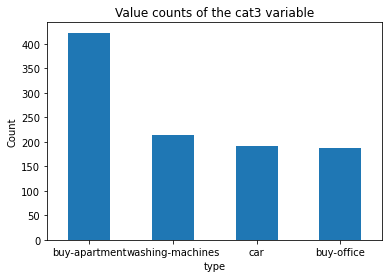

In [69]:
df.cat3.value_counts().plot(kind="bar")
plt.title("Value counts of the cat3 variable")
plt.xlabel("type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [73]:
buy_office = df[df['cat3']== 'buy-office']
number = len(buy_office)
df1 = df[df['cat3'] == 'washing-machines'].sample(number)
df2 = df[df['cat3'] == 'buy-apartment'].sample(number)
df3 = df[df['cat3'] == 'buy-office'].sample(number)
df4 = df[df['cat3'] == 'car'].sample(number)

In [74]:
frames = [df1, df2, df3, df4]
cat3_df = pd.concat(frames)
cat3_df.head()

,ماشین,لباسشویی,دوقلوی,کودک,سازنده,برند,قدیمی,ناسیونال,یک,ربع,...,فرمون,دوخته,فرزانگان,cat1,cat2,cat3,price,size,year,room_number
145,0.0,0.000000,0.0,0.259501,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,home-kitchen,appliance,washing-machines,1150000.0,0,0,0
33,0.0,0.575372,0.0,0.000000,0.0,0.0,1.942,0.0,0.0,0.0,...,0.0,0.0,0.0,home-kitchen,appliance,washing-machines,2500000.0,0,0,0
144,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,home-kitchen,appliance,washing-machines,450000.0,0,0,0
139,0.0,0.345223,0.0,0.060174,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,home-kitchen,appliance,washing-machines,17500000.0,0,0,0
208,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,home-kitchen,appliance,washing-machines,2850000.0,0,0,0


In [75]:
cat3_df['cat3'] = cat3_df['cat3'].str.replace('washing-machines','1')
cat3_df['cat3'] = cat3_df['cat3'].str.replace('buy-apartment','2')
cat3_df['cat3'] = cat3_df['cat3'].str.replace('buy-office','3')
cat3_df['cat3'] = cat3_df['cat3'].str.replace('car','4')

In [76]:
idx=cat3_df.columns.get_loc("cat3")
y = cat3_df.iloc[:, idx].values
target = []
for i in y :
    target.append(int(i))

In [81]:
#cat3_df = cat3_df.drop('Unnamed: 0',axis=1)
cat3_df = cat3_df.drop('cat1',axis=1)
cat3_df = cat3_df.drop('cat2',axis=1)
x = cat3_df.drop('cat3', axis=1)
x = cat3_df.drop('price', axis=1)

In [82]:
x = x.reset_index()

In [83]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split( x , y, test_size=0.2, random_state=0)

In [84]:

from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [85]:

predictions = text_classifier.predict(X_test)

In [86]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))  


[[30  0  0  0]
 [ 0 40  0  0]
 [ 0  1 43  0]
 [ 0  0  0 36]]


In [87]:
print(classification_report(y_test,predictions))  


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       0.98      1.00      0.99        40
           3       1.00      0.98      0.99        44
           4       1.00      1.00      1.00        36

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [88]:
print(accuracy_score(y_test, predictions))

0.9933333333333333
